In [1]:
import pandas as pd
data = pd.read_csv('Electric_Production_short.csv',index_col=0)
data.head()


,IPG2211A2N
DATE,
1990-01-01,83.2897
1990-02-01,76.1676
1990-03-01,72.2190
1990-04-01,66.3566
1990-05-01,64.9348


**Выполнили Мячков Дмитрий и Лобанов Александр БЭК 181**

**В качастве ряда возьмем индекс промышленного производства газа и электричества (коммерческой энергии) в США**

Источник данных https://fred.stlouisfed.org/series/IPG2211A2N

In [4]:
data.index = pd.to_datetime(data.index)
data.columns = ['Energy Production']

**1. График ряда**

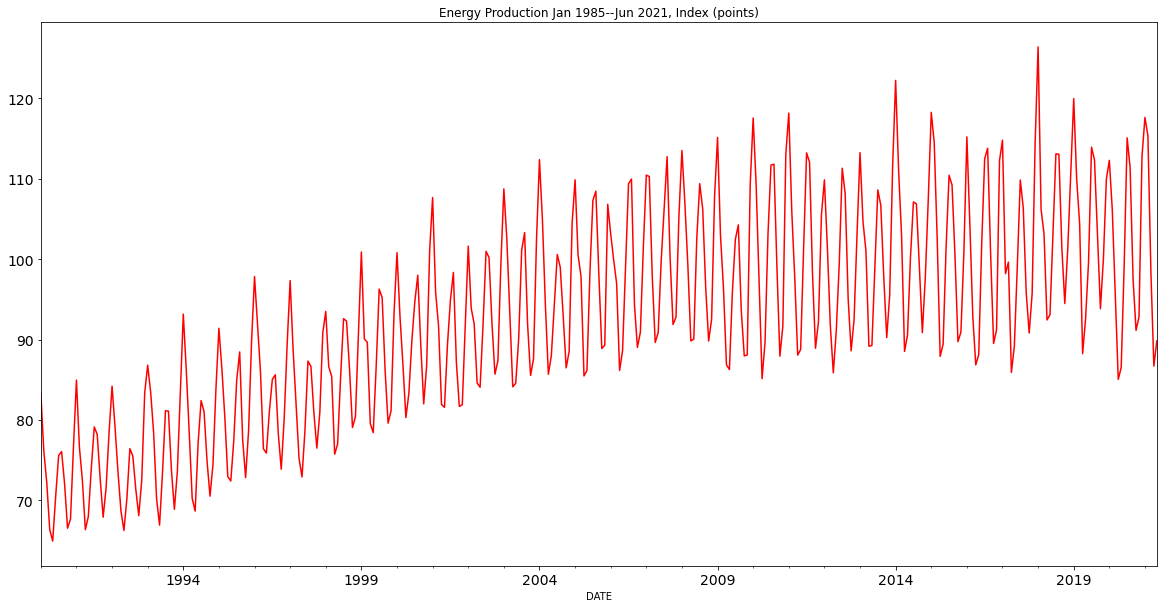

In [54]:
import chart_studio.plotly as ply
import cufflinks as cf
data.plot(title="Energy Production Jan 1985--Jun 2021, Index (points)", figsize = [20, 10], fontsize = 14, legend=False, color ='red')

  

**2. Графики автокорреляционных функций**

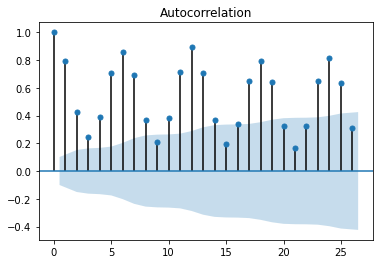

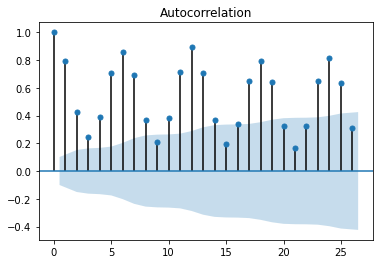

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

**2. Частичная автокорреляция**

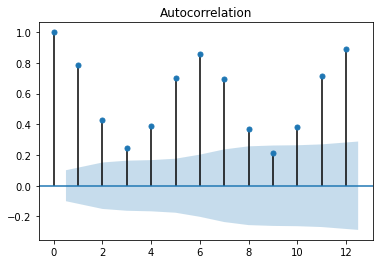

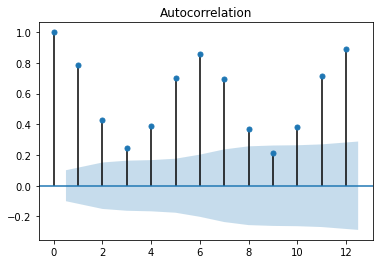

In [62]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(data, lags=12)

**2. Нарезка по годам для иллюстрации сезонности**

In [153]:
data_cut = data.rolling(window=3, center=True, win_type='triang').mean()

In [19]:
data_cut.name = 'Energy production by year'
#data_cut = data_cut.to_frame()
data_cut['day'] = data_cut.index.dayofyear
data_cut['Year'] = data_cut.index.year
data_cut


,Energy Production,day,Year
DATE,,,
1990-01-01,NaN,1,1990
1990-02-01,76.960975,32,1990
1990-03-01,71.740550,60,1990
1990-04-01,67.466750,91,1990
1990-05-01,66.677775,121,1990
...,...,...,...
2021-01-01,115.846150,1,2021
2021-02-01,111.703950,32,2021
2021-03-01,99.756150,60,2021


In [52]:
series = pd.pivot_table(data_cut, index=['day'],columns=['Year'], values=['Energy Production'])
series

Energy Production                                                         \
Year              1990       1991       1992       1993       1994       1995   
day                                                                             
1                  NaN  80.804200  81.510275  85.120650  88.980050  88.271725   
32           76.960975  77.673775  78.991550  83.053700  86.031325  86.119550   
60           71.740550  71.992600        NaN  77.656800  78.342350  79.984625   
61                 NaN        NaN  73.707150        NaN        NaN        NaN   
91           67.466750  68.297625        NaN  71.455550  71.893825  74.648775   
92                 NaN        NaN  69.280850        NaN        NaN        NaN   
121          66.677775  69.072325        NaN  69.380125  71.180925  73.783075   
122                NaN        NaN  67.853550        NaN        NaN        NaN   
152          70.372975  73.761350        NaN  73.750425  76.346950  78.031325   
153                NaN        NaN  70.786275        NaN        NaN        NaN   
182          74.432825  77.609225        NaN  79.216150  80.754100  83.940300   
183                NaN        NaN  74.651350        NaN        NaN        NaN   
213          74.955450  77.058000        NaN  79.278000  79.846975  84.862900   
214                NaN        NaN  74.706175        NaN        NaN        NaN   
244          71.696325  72.871450        NaN  74.376750  75.340825  79.104300   
245                NaN        NaN  71.588100        NaN        NaN        NaN   
274          68.204600  70.025900        NaN  71.282225  72.597500  75.476425   
275                NaN        NaN  70.018050        NaN        NaN        NaN   
305          69.636400  72.404600        NaN  74.852800  75.825300  79.990700   
306                NaN        NaN  74.125125        NaN        NaN        NaN   
335          76.497900  78.205250        NaN  83.355025  83.408225  89.010025   
336                NaN        NaN  81.526250        NaN        NaN        NaN   

                                                  ...                          \
Year       1996       1997       1998       1999  ...        2012        2013   
day                                               ...                           
1     94.325250  93.215400  91.125750  95.602800  ...  106.676950  108.580675   
32    91.894200  89.191125  88.046675  92.678725  ...  101.135300  105.904575   
60          NaN  81.978175  83.294000  87.229250  ...         NaN   98.969325   
61    85.073325        NaN        NaN        NaN  ...   92.697600         NaN   
91          NaN  76.326525  78.471300  81.783475  ...         NaN   92.155875   
92    78.679825        NaN        NaN        NaN  ...   88.638000         NaN   
121         NaN  74.946475  78.769800  80.788575  ...         NaN   91.693675   
122   77.311450        NaN        NaN        NaN  ...   91.864650         NaN   
152         NaN  79.440400  85.063850  87.063275  ...         NaN   99.006600   
153   80.764625        NaN        NaN        NaN  ...  100.304400         NaN   
182         NaN  85.021500  90.706175  93.635450  ...         NaN  105.755500   
183   84.192925        NaN        NaN        NaN  ...  107.545300         NaN   
213         NaN  85.391475  90.898250  93.208825  ...         NaN  104.958500   
214   83.655125        NaN        NaN        NaN  ...  105.679775         NaN   
244         NaN  81.239800  86.036700  86.769925  ...         NaN   98.134350   
245   79.042100        NaN        NaN        NaN  ...   96.741975         NaN   
274         NaN  78.710625  81.228175  81.616875  ...         NaN   93.453400   
275   76.564750        NaN        NaN        NaN  ...   91.198650         NaN   
305         NaN  82.312475  82.599025  83.777225  ...         NaN   98.247875   
306   80.927200        NaN        NaN        NaN  ...   94.181050         NaN   
335         NaN  89.038900  90.592600  92.105800  ...         NaN  110.284800   
336   89.118600        NaN        N

(0.0, 450.0)

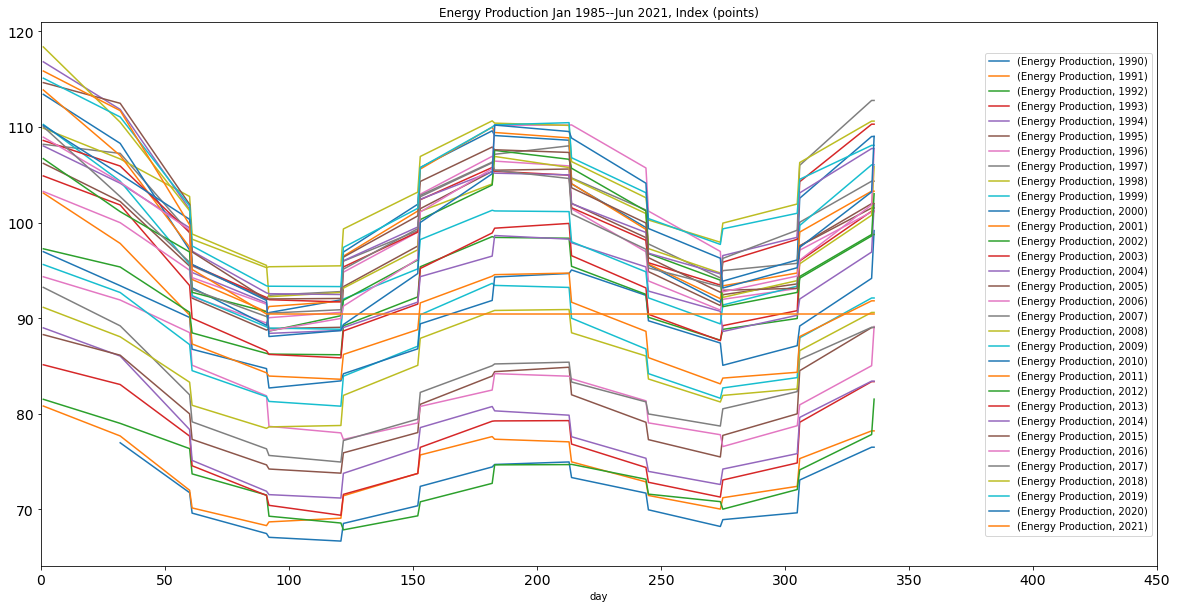

In [51]:
import matplotlib.pyplot as plt
series.interpolate(method='linear').plot(title="Energy Production Jan 1985--Jun 2021, Index (points)", figsize = [20, 10], fontsize = 14, legend=True)
plt.legend(loc="center right", ncol= 1)
plt.xlim([0,450])


**3. Иллюстрация тренда и сезонности**

1 ряд 

2 отдельно тренд 

3 отдельно сезонность

4 остатки

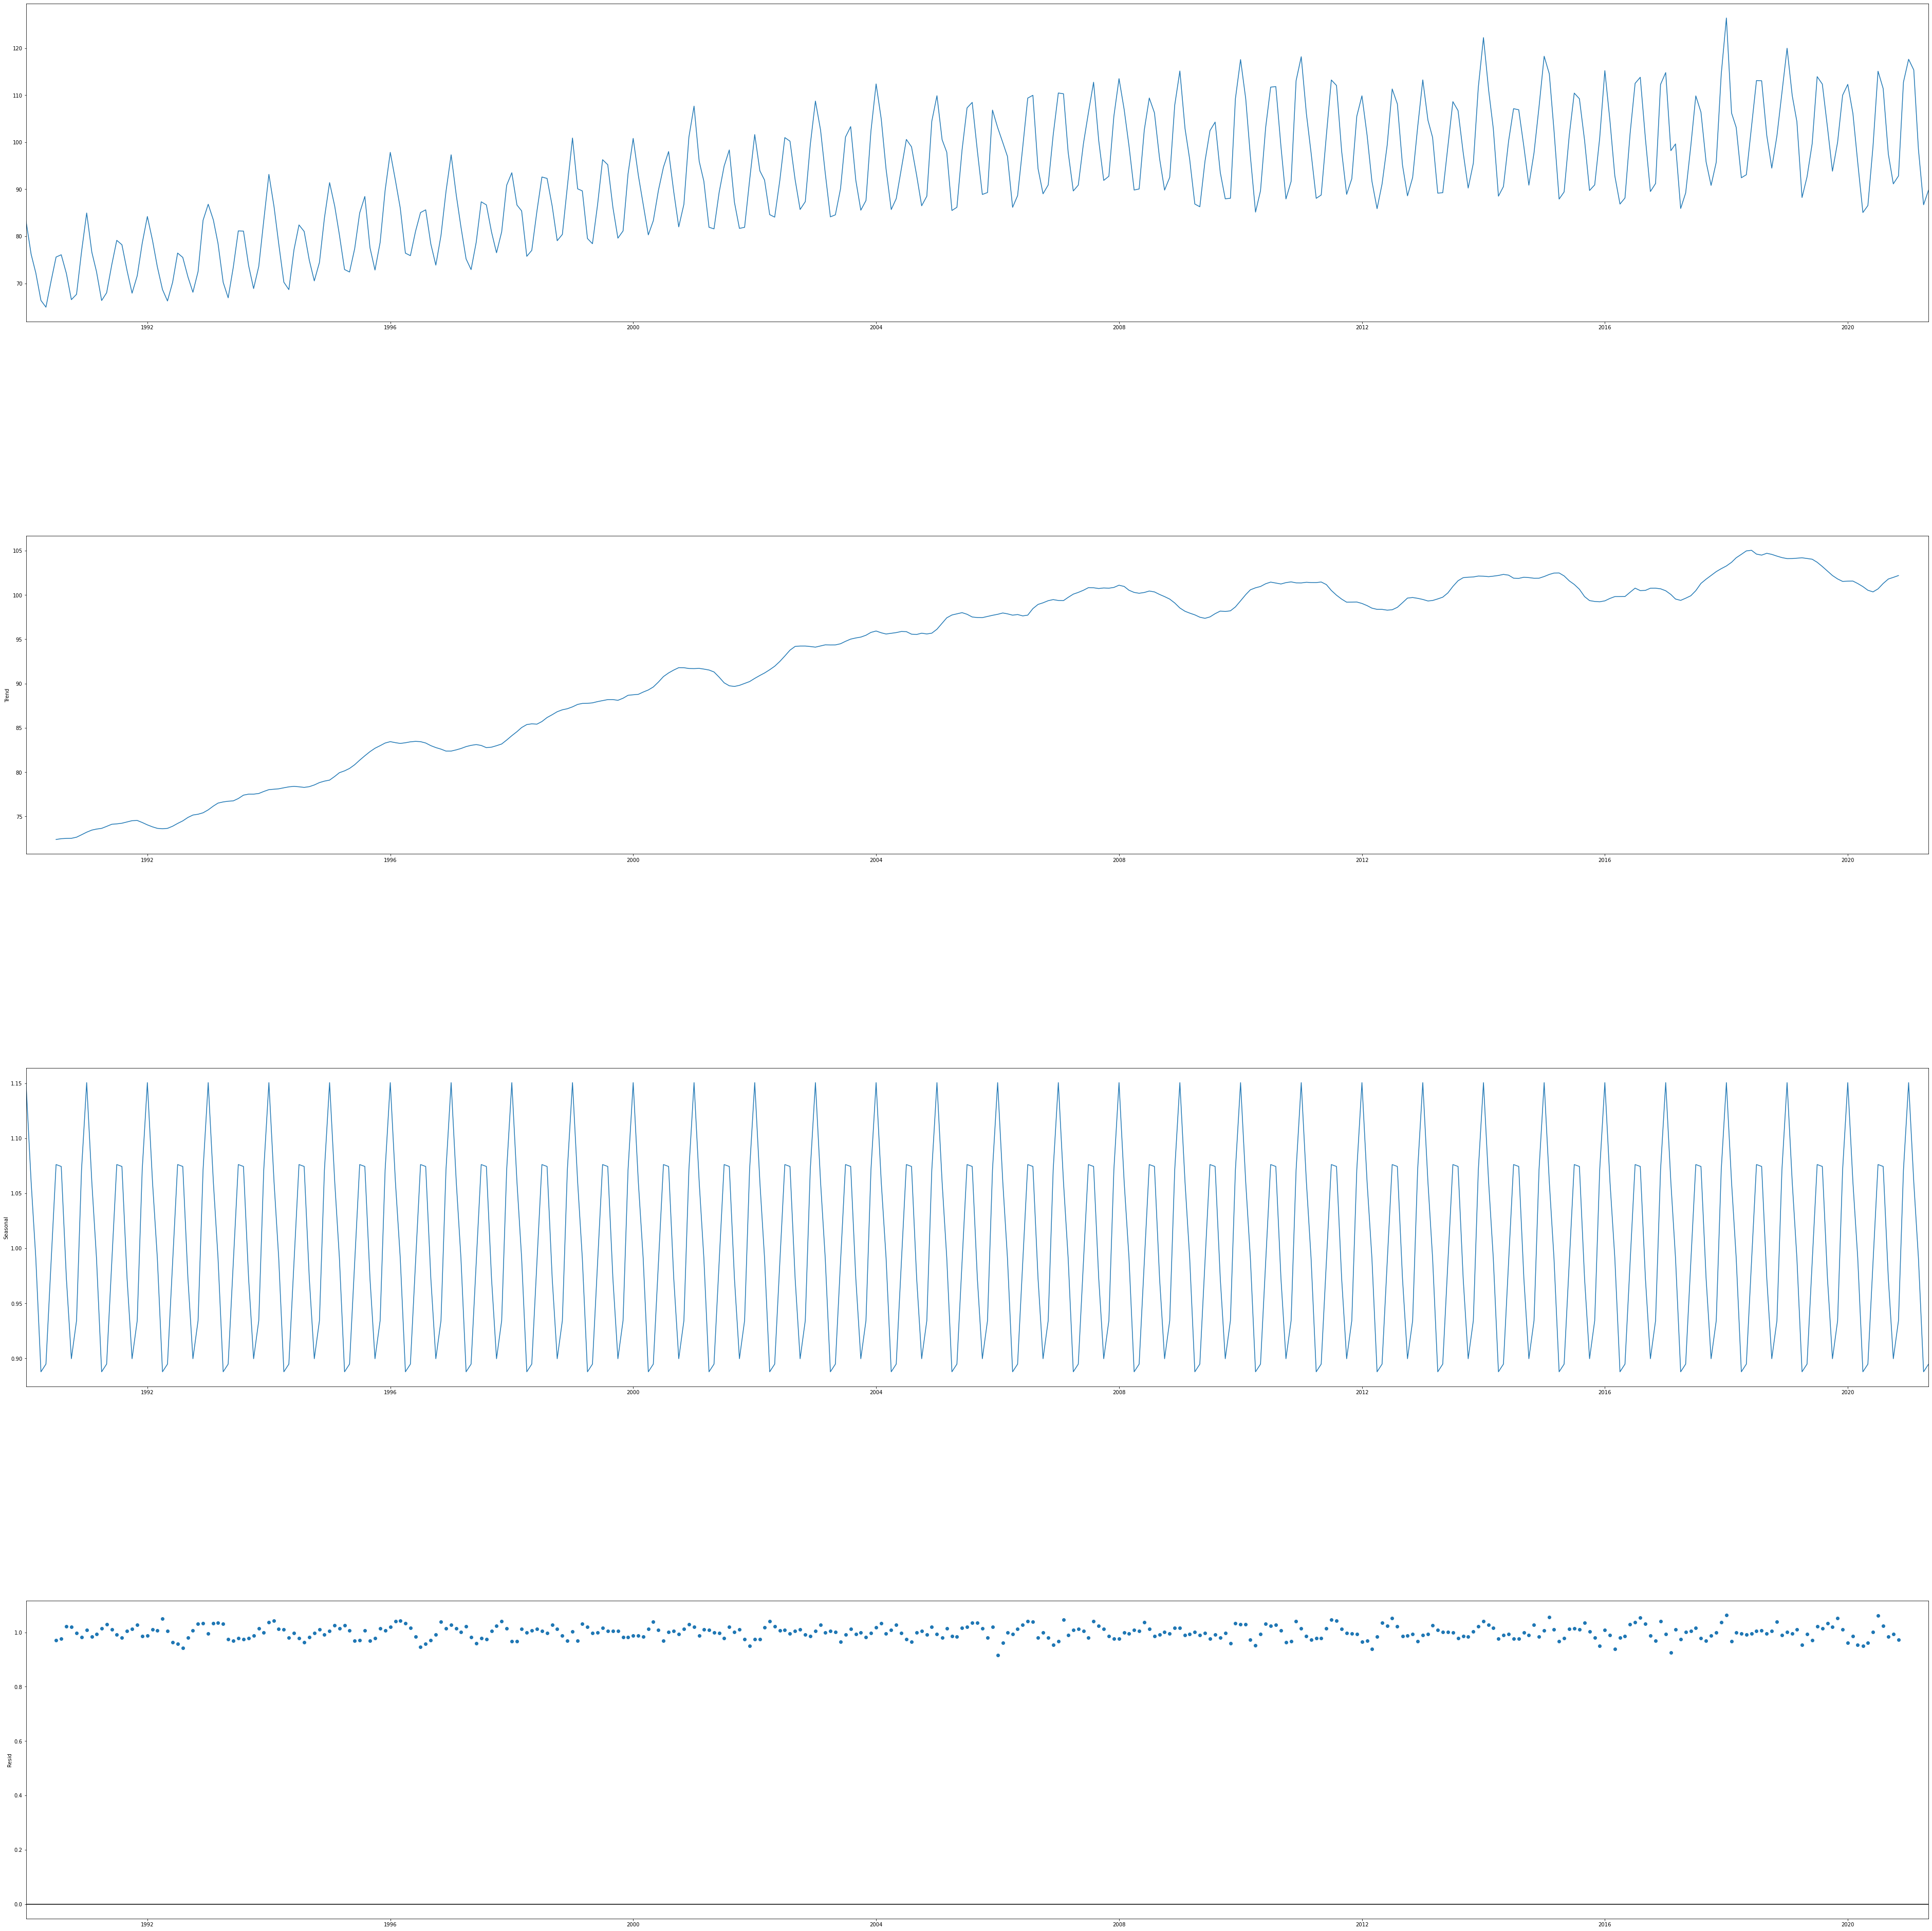

In [6]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')

fig = result.plot()
fig.set_size_inches(60, 60)


Производство электрэнергии имеет четкую сезонность внутри года с пиками потребления зимой и летом для компенсайции температуры: зимой для обогрева, летом для охлаждения. С годами потребление находитсяв четком возрастающем тренде, как и амплитуда ряда. Также можно заметить, что летний пик производства (и, соответственно, потребления) по абсолютному значению всегда ниже чем зимний пик в том же году. Остатки этого ряда стационарны.   

Методом пристального взгляда для оценки стационарности выбираем ререссию с константой и трендом

In [67]:
#adjusted DF test, H0 = ряд не стационарен.
from statsmodels.tsa.stattools import adfuller, kpss
adfuller(data, regression='ct', autolag='AIC')

(-1.5557929967362918,
 0.8092646800488138,
 15,
 361,
 {'1%': -3.984068829202497,
  '5%': -3.422722073800467,
  '10%': -3.134242920515188},
 1790.2505562849042)

In [68]:
#KPSS test, H0 = ряд стационарен
kpss(data, regression='ct')

C:\Users\MI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

C:\Users\MI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.5071245162500366,
 0.01,
 17,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

Тесты Дики-Фуллера и kpss тест показывают, что ряд стационарен. В первом случае было 15 лагов, во втором - 17

Точек излома у ряда нет

**4. Алгоритм Хиндмана-Хандакара автоматического подбора SARIMA**

In [109]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ImportError: cannot import name 'sarima' from 'pmdarima.arima' (C:\Users\MI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pmdarima\arima\__init__.py)

**Обучающая и тестовая выборки**

In [89]:
train = data.loc['1990-01-01':'2020-05-01']
test = data.loc['2020-06-01':]

In [9]:
len(test)

12

In [10]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(2, 1, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [70]:
future_forecast_Asarima = stepwise_model.predict(n_periods=12)
print(future_forecast_Asarima)

[ 98.81452282 110.79396337 109.99586107 100.52946072  91.4905976
  95.82999938 109.43228643 117.47854203 106.0053897   99.15628502
  87.90400918  89.50299847]


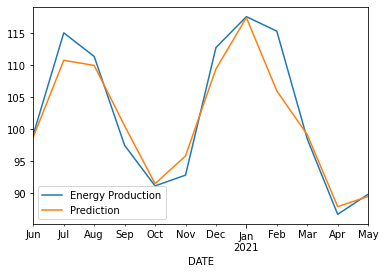

In [71]:
future_forecast_Asarima = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [74]:
from sklearn.metrics import mean_absolute_error as mae
mae(test,future_forecast)

2.293449001032523

**5. Auto SARIMA самая эффективная модель по MAE. Прогноз  на основе всего датасета**

In [138]:
stepwise_model.fit(data['Energy Production'])
future_forecast_Asarima = stepwise_model.predict(n_periods=12)
print(future_forecast_Asarima)

[101.60973454 113.03407816 111.25904534  99.65524956  91.99758297
  95.41607431 111.82719722 120.5116662  109.51428131 101.54221714
  89.2657206   91.7634691 ]


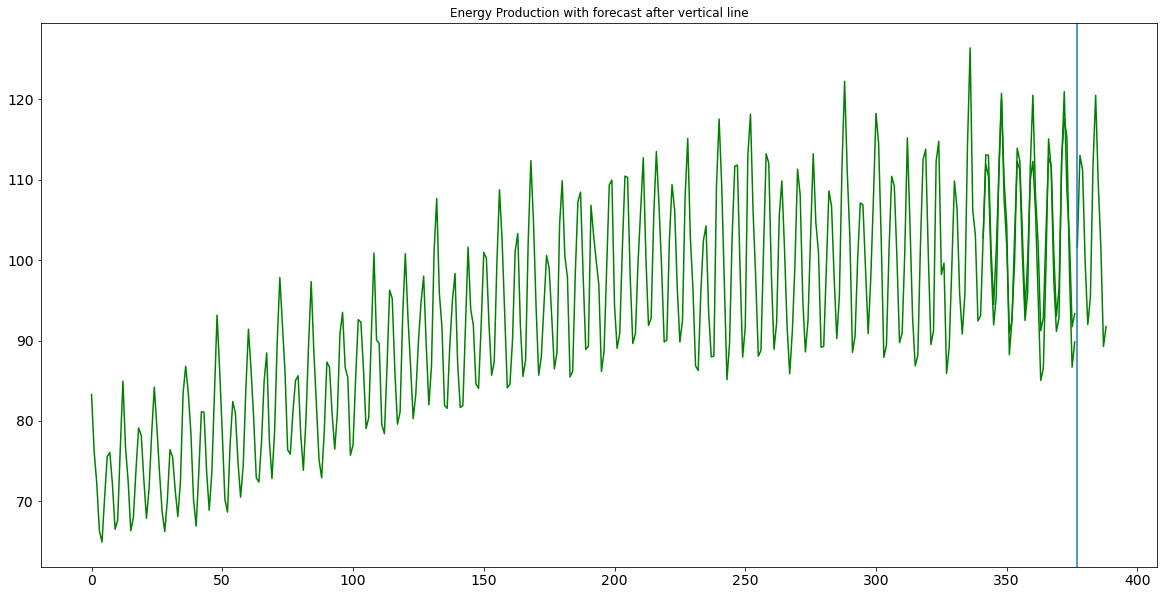

In [152]:
forecast_df=pd.DataFrame(future_forecast_Asarima)
new_df= data.append(forecast_df)

new_df.index = range(389)
new_df
new_df.plot(title="Energy Production with forecast after vertical line", figsize = [20, 10], fontsize = 14, legend=False, color ='green')
plt.axvline(x=377)

**4. SARIMA**

In [111]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [117]:
model=sm.tsa.statespace.SARIMAX(data['Energy Production'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

C:\Users\MI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\MI\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Energy Production   No. Observations:                  377
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -870.216
Date:                            Wed, 16 Jun 2021   AIC                           1750.431
Time:                                    19:48:44   BIC                           1769.917
Sample:                                01-01-1990   HQIC                          1758.176
                                     - 05-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4936      0.045     10.929      0.000       0.405       0.582
ma.L1         -0.9526      0.018    -52.457      0.000      -0.988      -0.917
ar.S.L12       0.1203      0.062      1.948      0.051      -0.001       0.241
ma.S.L12      -0.8081      0.044    -18.167      0.000      -0.895      -0.721
sigma2         6.7408      0.453     14.877      0.000       5.853       7.629
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.71
Prob(Q):                              0.93   Prob(JB):                         0.01
Heteroskedasticity (H):               2.98   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

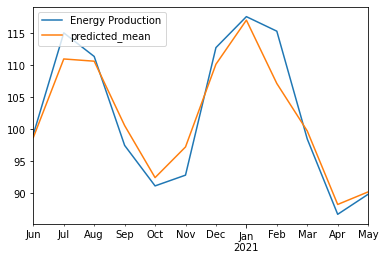

In [134]:
forecast=results.predict(start=365,end=376,dynamic=True)
pd.concat([test,forecast],axis=1).plot()

In [135]:
mae(test,forecast)

2.383791007269245

**4. Naive (в приложении в pdf)**

In [103]:
data_n = pd.DataFrame(data, columns = ['Energy Production'])
data_n.index = range(377)
data_n
from sktime.forecasting.naive import NaiveForecaster
Nmodel = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

ModuleNotFoundError: No module named 'sktime'

**ETS(AAA) & auto ETS**

In [ ]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(train)
ETSforecast = forecaster.predict(test)
plot_series(train, test, ETSforecast, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)